In [230]:
import pandas as pd
import numpy as np
import math
from skimpy import skim

from sklearn.preprocessing import MultiLabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns

In [138]:
import matplotlib as mlp

sns.set_theme(style='darkgrid', palette='mako')

mlp.rcParams['axes.labelsize'] = 10
mlp.rcParams['axes.titlesize'] = 15

In [63]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

In [270]:
RANDOM = 42

# LOADING DATA

In [139]:
cargotype_info = pd.read_csv('data/cargotype_info.csv', index_col='Unnamed: 0')
carton_price = pd.read_excel('data/carton_price.xlsx')
carton = pd.read_csv('data/carton.csv')
data = pd.read_csv('data/data.csv', index_col='Unnamed: 0')
sku_cargotypes = pd.read_csv('data/sku_cargotypes.csv', index_col='Unnamed: 0')
sku = pd.read_csv('data/sku.csv', index_col='Unnamed: 0')

In [140]:
def view_func(data):
    display(data)
    skim(data)
    print('DUPLICATES')
    print(data.duplicated().sum())

## CARGOTYPE_INFO

In [141]:
view_func(cargotype_info)

,cargotype,description
0,770.0,консервы
1,301.0,тяжеловесный и крупногабаритный 20кг
2,980.0,Требует обязательной маркировки
3,985.0,"Не требует наличия маркировки, но требует выво..."
4,990.0,Потребует обязательной маркировки в ближайшем ...
5,910.0,интим товар
6,900.0,медикаменты
7,10.0,документы и ценные бумаги
8,50.0,предметы искусства
9,100.0,товары народного потребления


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 98     │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     2 │        2 │      550 │    310 │     0 │    300 │    770 │    1300 │  ▆███▆▁   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ description               │       0 │          0 │                          2.4 │                      240 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
1


In [142]:
cargotype_info = cargotype_info.dropna().reset_index(drop=True)

## CARTON_PRICE

In [143]:
view_func(carton_price)

,Unnamed: 0,01.03.2023
0,MYA,1.109861
1,MYB,2.297432
2,MYC,3.616713
3,MYD,6.918375
4,MYE,8.062722
5,MYF,4.083130
6,YMA,4.392937
7,YMC,7.777487
8,YME,23.670260
9,YMF,10.661487


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 15     │ │ string      │ 1     │                                                          │
│ │ Number of columns │ 2      │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0     ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ 01.03.2023          │     0 │        0 │       14 │    13 │    1.1 │    4.2 │     21 │      41 │  █▅▁▁▁▃   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴───────┴────────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Unnamed: 0                │       0 │          0 │                            1 │                       15 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


In [144]:
carton_price.columns = ['cartontype', 'price']

## CARTON

In [145]:
view_func(carton)

,CARTONTYPE,LENGTH,WIDTH,HEIGHT,DISPLAYRFPACK
0,YMA,24.7,15.0,10.00,1
1,YMC,30.0,20.0,15.00,1
2,YME,30.0,30.0,44.50,1
3,YMF,35.0,25.0,15.00,1
4,YMG,44.7,30.0,20.00,1
5,YMH,42.0,20.0,86.00,0
6,YMJ,50.0,29.0,48.00,0
7,KSD,0.0,0.0,0.00,0
8,YML,60.0,40.0,45.00,1
9,YMN,60.0,60.0,40.00,0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 29     │ │ float64     │ 3     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ int64       │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name           ┃ NA    ┃ NA %    ┃ mean    ┃ sd      ┃ p0   ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ LENGTH                │     0 │       0 │      40 │      23 │    0 │     27 │     52 │      90 │  ▂▃█▁▃▁   │  │
│ │ WIDTH                 │     0 │       0 │      30 │      18 │    0 │     20 │     40 │      63 │  ▃██▃▂▅   │  │
│ │ HEIGHT                │     0 │       0 │      27 │      26 │    0 │      5 │     45 │      86 │  █▄▁▃▂▁   │  │
│ │ DISPLAYRFPACK         │     0 │       0 │    0.62 │    0.49 │    0 │      0 │      1 │       1 │  ▅    █   │  │
│ └───────────────────────┴───────┴─────────┴─────────┴─────────┴──────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ CARTONTYPE                │       0 │          0 │                            1 │                       29 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


In [146]:
carton.columns = [s.lower() for s in carton.columns]

## DATA

In [147]:
view_func(data)

,whs,orderkey,selected_cartontype,box_num,recommended_cartontype,selected_carton,sel_calc_cube,recommended_carton,pack_volume,rec_calc_cube,goods_wght,sku,who,trackingid
0,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
1,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
2,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
3,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
4,0,d48f3211c1ffccdc374f23139a9ab668,NONPACK,1,YML,NONPACK,0,YML,2046,108000,0.100,af49bf330e2cf16e44f0be1bdfe337bd,b7325da1af89a46059164618eb03ae38,6c304d5c2815ccd2ba5046c101294c24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325618,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743
325619,7,0e4f34db53e37d6bf171c2e055e2b4e0,MYC,1,YMC,MYC,4560,YMC,2080,8525,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,be7c9ad8b9430d358e6c276b94e2beff,f94f078101752133502202383bc87743
325620,7,e71d2e750ce9a7a39c273c634be1665d,YMC,1,YMC,YMC,8525,YMC,3523,8525,0.284,9db21acf9e6c1a66493c246c1461f989,be7c9ad8b9430d358e6c276b94e2beff,58054d533ef06746ffd8cf99fad4a8cb
325621,7,2e2a642f611b5a6f2c404ab945fbc2a3,MYB,1,YMU,MYB,2816,YMU,552,2592,0.230,4aedb72c5662562524f6119918c7179b,be7c9ad8b9430d358e6c276b94e2beff,1666b5c878be124f05fb9a1d95dd8a68


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 325623 │ │ string      │ 8     │                                                          │
│ │ Number of columns │ 14     │ │ int64       │ 5     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA   ┃ NA %   ┃ mean     ┃ sd       ┃ p0   ┃ p25    ┃ p75     ┃ p100       ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━┩  │
│ │ whs                 │    0 │      0 │      1.4 │      2.1 │    0 │      0 │       3 │          7 │ █▁▁▁ ▁  │  │
│ │ box_num             │    0 │      0 │      2.8 │       16 │    1 │      1 │       1 │        240 │    █    │  │
│ │ sel_calc_cube       │    0 │      0 │    11000 │    14000 │    0 │   3400 │   16000 │     110000 │   █▂    │  │
│ │ pack_volume         │    0 │      0 │     5400 │    29000 │    0 │    500 │    3200 │    1800000 │    █    │  │
│ │ rec_calc_cube       │    0 │      0 │    18000 │    27000 │    0 │   3400 │   18000 │     110000 │ █▂▁  ▁  │  │
│ │ goods_wght          │    0 │      0 │      1.1 │      4.1 │    0 │   0.11 │     0.8 │        150 │    █    │  │
│ └─────────────────────┴──────┴────────┴──────────┴──────────┴──────┴────────┴─────────┴────────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                           ┃ NA    ┃ NA %      ┃ words per row            ┃ total words         ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ orderkey                              │     0 │         0 │                        1 │              330000 │  │
│ │ selected_cartontype                   │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_cartonty                  │     0 │         0 │                        1 │              330000 │  │
│ │ selected_carton                       │     0 │         0 │                        1 │              330000 │  │
│ │ recommended_carton                    │     0 │         0 │                        1 │              330000 │  │
│ │ sku                                   │     0 │         0 │                        1 │              330000 │  │
│ │ who                                   │     0 │         0 │                        1 │              330000 │  │
│ │ trackingid                            │     0 │         0 │                        1 │              330000 │  │
│ └───────────────────────────────────────┴───────┴───────────┴──────────────────────────┴─────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
91795


## SKU_CARGOTYPES

In [148]:
view_func(sku_cargotypes)

,sku,cargotype
0,4862bf0e760a593b13f3f2fcf822e533,290
1,4862bf0e760a593b13f3f2fcf822e533,901
2,50d3c4fc66ad423b7feaadff2d682ee0,290
3,50d3c4fc66ad423b7feaadff2d682ee0,901
4,24ce9dba9f301ada55f60e25ee1498d2,290
...,...,...
21053147,5786e5c2309967c64b10e443ce1a807c,691
21053148,859788a147004b9a1d24a8168460f79a,200
21053149,859788a147004b9a1d24a8168460f79a,290
21053150,859788a147004b9a1d24a8168460f79a,310


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 21053152 │ │ string      │ 1     │                                                        │
│ │ Number of columns │ 2        │ │ int64       │ 1     │                                                        │
│ └───────────────────┴──────────┘ └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name         ┃ NA    ┃ NA %     ┃ mean     ┃ sd     ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ cargotype           │     0 │        0 │      530 │    260 │     0 │    290 │    690 │    1300 │   ▁█▅▃▄   │  │
│ └─────────────────────┴───────┴──────────┴──────────┴────────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                 21000000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


## SKU

In [149]:
view_func(sku)

,sku,a,b,c
0,8ba57dcdba9a58b0c4edd180bef6afc9,11.0,31.0,28.0
1,d9af6ce6f9e303f4b1a8cb47cde21975,29.0,14.0,40.0
2,8b91fd242bde88f0891380506d9c3caa,12.0,13.0,35.0
3,e8af308a7659e34194770d1e3a48e144,3.0,13.0,8.0
4,dc0e2542e122731217289b8e6d3bd3f8,96.0,18.0,56.0
...,...,...,...,...
6385956,5367045e88650a12cde4803f55ed7525,0.0,0.0,0.0
6385957,8a3dcb8f1ccce02a3df63a9db0903f38,0.0,0.0,0.0
6385958,31e5069a999cd927bd623fd699957630,0.0,0.0,0.0
6385959,888059750dcd75922faf3b60144e4def,0.0,0.0,0.0


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                 Data Types                                                                │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                         │
│ ┃ dataframe         ┃ Values  ┃ ┃ Column Type ┃ Count ┃                                                         │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                         │
│ │ Number of rows    │ 6385961 │ │ float64     │ 3     │                                                         │
│ │ Number of columns │ 4       │ │ string      │ 1     │                                                         │
│ └───────────────────┴─────────┘ └─────────────┴───────┘                                                         │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┓  │
│ ┃ column_name          ┃ NA    ┃ NA %     ┃ mean     ┃ sd    ┃ p0    ┃ p25    ┃ p75    ┃ p100    ┃ hist      ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━┩  │
│ │ a                    │     0 │        0 │       21 │    19 │     0 │     10 │     28 │    6600 │     █     │  │
│ │ b                    │     0 │        0 │       12 │    15 │     0 │      3 │     16 │    2000 │     █     │  │
│ │ c                    │     0 │        0 │       18 │    15 │     0 │      8 │     24 │     590 │     █     │  │
│ └──────────────────────┴───────┴──────────┴──────────┴───────┴───────┴────────┴────────┴─────────┴───────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ sku                       │       0 │          0 │                            1 │                  6400000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

DUPLICATES
0


# EDA

### Сделаем группу с SKU и марками типов товара

In [150]:
sku_groups = sku_cargotypes.groupby('sku')['cargotype'].apply(list).reset_index()

In [151]:
sku_groups.head()

,sku,cargotype
0,0000060b72e5a5d67ee3c37ceab6b72a,"[290, 671, 950]"
1,00000c9eb5ba2364380ab2e3bf870c23,"[290, 440, 441, 460, 480, 690]"
2,000010b2dda4921d4982818e241847bf,"[290, 440, 441, 480, 490, 690]"
3,00001196fe633174323cb69c4ad05ecb,[290]
4,000015d94c63b8dbac214ad23bb8bb20,"[200, 290, 310]"


### Создание датасета для обучения

Добавим объем упаковки и объем товара

In [152]:
carton['vol'] = carton[['length', 'width', 'height']].prod(axis=1)
carton['dim_sum'] = carton[['length', 'width', 'height']].sum(axis=1)

sku['vol'] = np.floor(sku[['a', 'b', 'c']].prod(axis=1))
sku['dim_sum'] = sku[['a', 'b', 'c']].sum(axis=1)

In [208]:
df = data.copy()

Дропнем колонки

In [209]:
cols_to_drop = ['who', # Лишняя информация
                'trackingid', # Лишняя информация для обучения
                'recommended_cartontype', # Работа прошлого алгоритма - для обучения лишняя инфа
                'recommended_carton', # Дубликат
                'selected_cartontype', # Дубликат 
                'rec_calc_cube', # Результат предсказания
                #'orderkey', 
                'whs' # Не влияет на задачу
                ]

In [210]:
df = df.drop(cols_to_drop, axis=1)

df.head()

,orderkey,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
1,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
2,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
3,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd
4,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.1,af49bf330e2cf16e44f0be1bdfe337bd


In [211]:
df.duplicated().sum()

91798

In [212]:
df = df.drop_duplicates().reset_index(drop=True)

df.shape

(233825, 7)

Добавим ОБЪЕМ И СУММУ РАЗМЕРОВ ТОВАРА

In [213]:
sku = sku[sku['vol']>0]

In [214]:
df = pd.merge(df, sku, on='sku', how='left')

df = df.rename(columns={'vol':'sku_vol', 
                        'a':'sku_a', 
                        'b': 'sku_b',
                        'c': 'sku_c'})

df.head()

,orderkey,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3


Максимальный размер и диагональ товара в заказе

In [215]:
df_grouped = df.groupby('orderkey')[['sku_a', 'sku_b', 'sku_c']].max().reset_index()

df_grouped['sku_max_size'] = df_grouped[['sku_a', 'sku_b', 'sku_c']].max(axis=1)

df_grouped['sku_max_diag'] = round(np.sqrt(df['sku_a']**2 + df['sku_b']**2 + df['sku_c']**2), 1)

df_grouped

,orderkey,sku_a,sku_b,sku_c,sku_max_size,sku_max_diag
0,00004fc4755eeb7e851e52ec91130fe4,17.0,38.0,6.0,38.0,33.4
1,00008e765c2d85abfa9c97563afd98ef,19.0,3.0,5.0,19.0,53.2
2,0000c268eb1be1dd5b8c1a032f7318fc,25.0,7.0,17.0,25.0,43.7
3,0000fc4c7acac6e89f82392b90e47a27,8.0,6.0,22.0,22.0,47.2
4,0001963724fa4cc12d4f025056085633,15.0,17.0,10.0,17.0,42.0
...,...,...,...,...,...,...
159894,fffe13683b35336a4c1bb061f479f05b,9.0,1.5,9.0,9.0,25.7
159895,ffff1e5d7f5b52f28d733ba01a4589b9,25.0,3.0,14.0,25.0,25.7
159896,ffff1f0a51126b373f36d7733a5ddb0f,14.8,4.1,21.9,21.9,43.0
159897,ffff748210310fffe23e3ade55d26401,5.0,6.0,4.0,6.0,36.7


Добавляем в датасет

In [216]:
df = pd.merge(df, df_grouped[['orderkey', 'sku_max_size', 'sku_max_diag']], on='orderkey', how='left')

Посчитаем кол-во товаров в заказе

In [217]:
items = df.groupby('orderkey')['sku'].count().reset_index()

items.columns = ['orderkey', 'items']

items

,orderkey,items
0,00004fc4755eeb7e851e52ec91130fe4,1
1,00008e765c2d85abfa9c97563afd98ef,1
2,0000c268eb1be1dd5b8c1a032f7318fc,1
3,0000fc4c7acac6e89f82392b90e47a27,2
4,0001963724fa4cc12d4f025056085633,2
...,...,...
159894,fffe13683b35336a4c1bb061f479f05b,1
159895,ffff1e5d7f5b52f28d733ba01a4589b9,1
159896,ffff1f0a51126b373f36d7733a5ddb0f,1
159897,ffff748210310fffe23e3ade55d26401,1


Добавим КОЛ-ВО ТОВАРОВ В ЗАКАЗЕ

In [218]:
df = pd.merge(df, items, on='orderkey', how='left')

df

,orderkey,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sku_max_diag,items
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,25.5,3
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,48.8,1
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,19.1,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,15.4,1
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,18.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233820,8ed0af8473526c54b4b2f99f0060c3ea,1,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0,44.0,15.4,1
233821,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0,26.0,28.5,1
233822,e71d2e750ce9a7a39c273c634be1665d,1,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9,30.3,10.2,1
233823,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0,23.0,48.8,1


In [219]:
df = df.dropna().reset_index(drop=True)

In [220]:
df = df[df['selected_carton']!='YMB']

In [221]:
df

,orderkey,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sku_max_diag,items
0,d48f3211c1ffccdc374f23139a9ab668,1,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,25.5,3
1,4b33fcc98ea1f59d6fe4eb2e0a48bb4b,1,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,48.8,1
2,3e646181f6f708edd3326c1626c12d23,1,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,19.1,1
3,7047c16a6b7c120162ca3da0ebca43fd,1,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,15.4,1
4,097917e584151c0c21f205b2c3aafa10,1,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,18.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223023,8ed0af8473526c54b4b2f99f0060c3ea,1,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0,44.0,15.4,1
223024,0e4f34db53e37d6bf171c2e055e2b4e0,1,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0,26.0,28.5,1
223025,e71d2e750ce9a7a39c273c634be1665d,1,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9,30.3,10.2,1
223026,2e2a642f611b5a6f2c404ab945fbc2a3,1,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0,23.0,48.8,1


In [222]:
df = df.drop('orderkey', axis=1)

In [223]:
df = df.drop_duplicates().reset_index(drop=True)

df

,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sku_max_diag,items
0,1,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,25.5,3
1,1,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,48.8,1
2,1,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,19.1,1
3,1,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,15.4,1
4,1,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,18.6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222299,1,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0,44.0,15.4,1
222300,1,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0,26.0,28.5,1
222301,1,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9,30.3,10.2,1
222302,1,MYB,2816,552,0.230,4aedb72c5662562524f6119918c7179b,23.0,2.0,12.0,552.0,37.0,23.0,48.8,1


# ГРАФИКИ

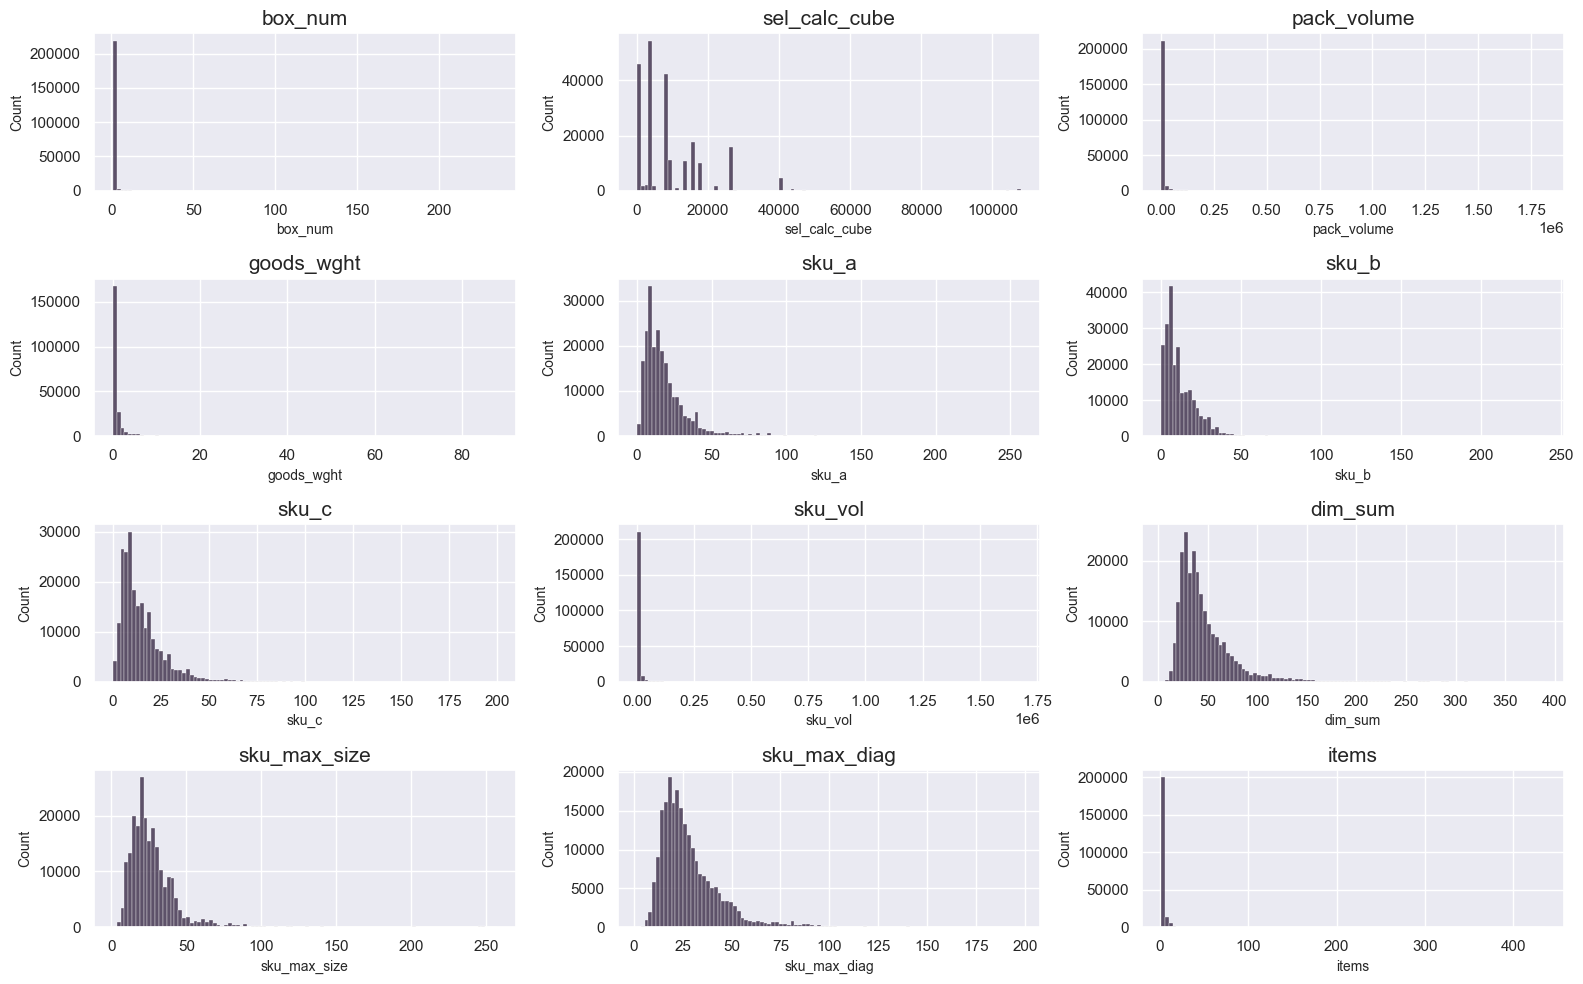

In [225]:
df_numeric = df.select_dtypes(include=['float64', 'int64'])

fig, axs = plt.subplots(4, 3, figsize=(16, 10))

axs = axs.ravel()

for i in range(12):
    sns.histplot(df_numeric[df_numeric.columns[i]], bins=100, ax=axs[i])
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

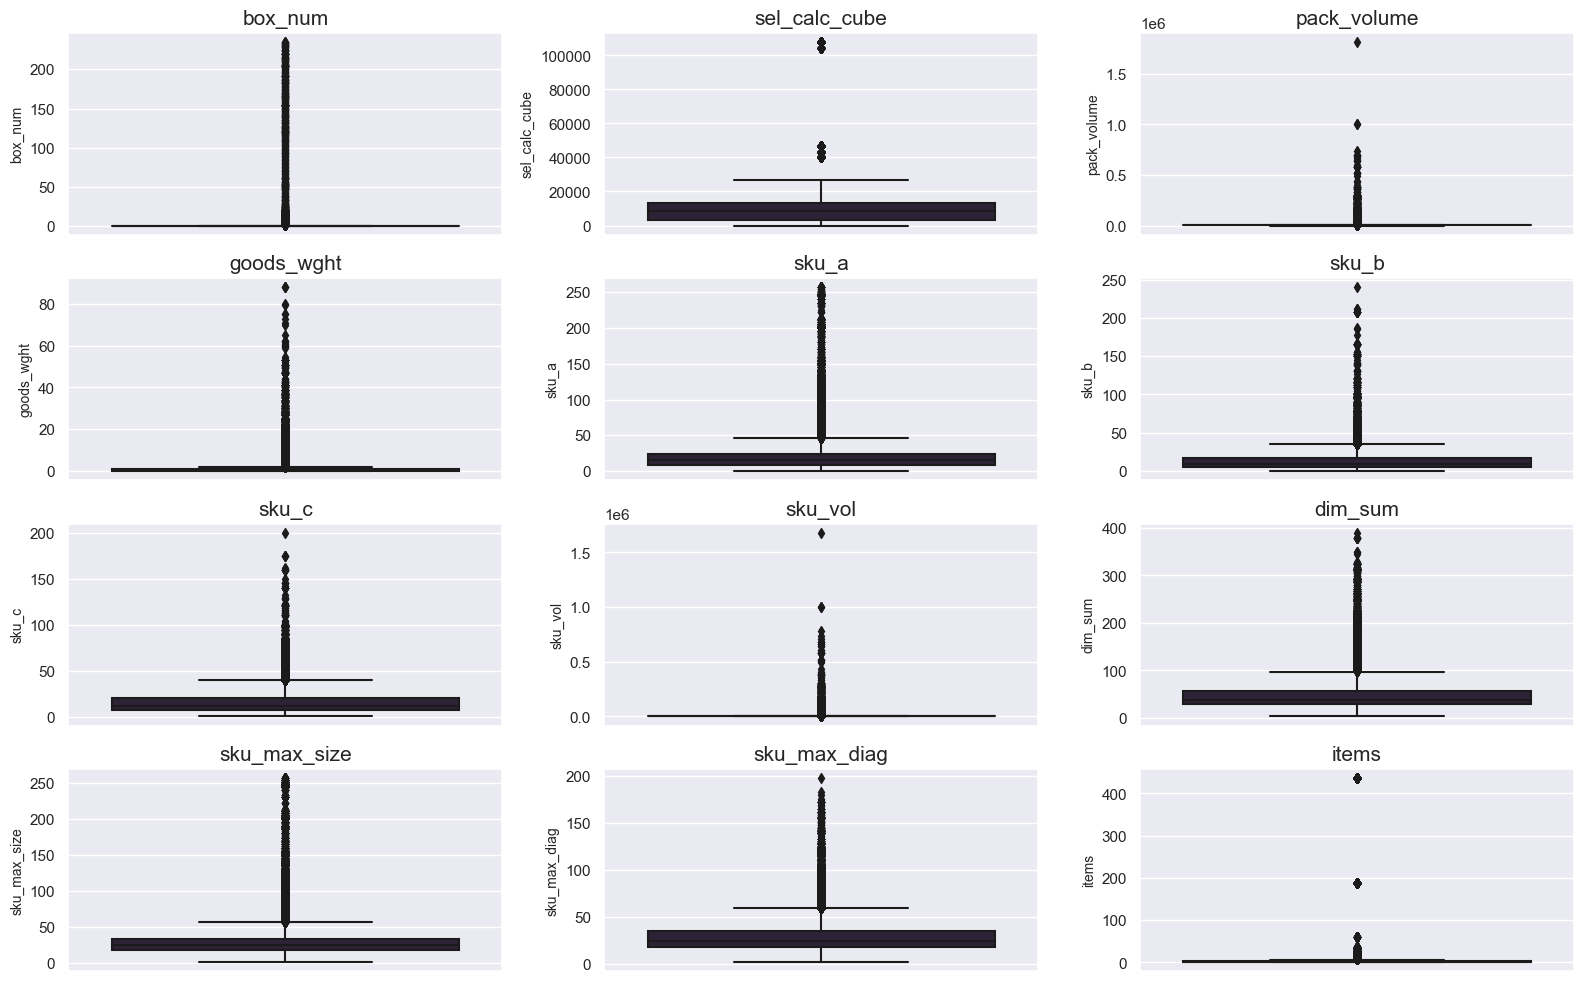

In [226]:
fig, axs = plt.subplots(4, 3, figsize=(16, 10))

axs = axs.ravel()

for i in range(12):
    sns.boxplot(y=df_numeric[df_numeric.columns[i]], ax=axs[i])  
    axs[i].set_title(df_numeric.columns[i])

plt.tight_layout()
plt.show()

# Закодируем КАРГОТИПЫ

In [252]:
mlb = MultiLabelBinarizer()

one_hot = mlb.fit_transform(sku_groups['cargotype'])

one_hot_df = pd.DataFrame(one_hot, columns=mlb.classes_)

one_hot_df['sku'] = sku_groups['sku']

In [237]:
df = pd.merge(df, one_hot_df, on='sku', how='left')

In [249]:
df.describe()

cols_zero_max = df.describe().columns[df.describe().loc['max'] == 0]

cols_zero_max

Index([10, 80, 299, 333, 752, 760, 907, 985], dtype='object')

Дропнем колонки, где только нулевые значения

In [250]:
df = df.drop(cols_zero_max, axis=1)

In [257]:
numeric_columns = df.loc[:,df.dtypes!=np.object_].columns

In [256]:
### Секретные функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 10))

Top Absolute Correlations
pack_volume  sku_vol         0.986180
300          301             0.975904
620          623             0.952071
440          441             0.854017
sku_a        dim_sum         0.852516
box_num      items           0.849198
600          970             0.843510
dim_sum      sku_max_size    0.800157
sku_a        sku_max_size    0.790797
120          1010            0.766349
dtype: float64


Есть сильная корреляция некоторых признаков

Надо будет потом посмотреть что с ними делать

In [281]:
df = df.dropna().reset_index(drop=True)

In [282]:
df

,box_num,selected_carton,sel_calc_cube,pack_volume,goods_wght,sku,sku_a,sku_b,sku_c,sku_vol,dim_sum,sku_max_size,sku_max_diag,items,0,20,40,81,110,120,130,140,160,200,210,290,291,292,300,301,302,303,305,310,315,320,330,340,350,360,400,410,440,441,460,480,485,490,510,520,600,601,610,611,620,621,622,623,640,641,670,671,672,673,690,691,692,710,720,750,751,770,780,790,799,801,900,901,905,908,910,911,920,930,931,950,955,960,970,980,990,1010,1011,1300
0,1,NONPACK,0,2046,0.100,af49bf330e2cf16e44f0be1bdfe337bd,11.0,6.0,31.0,2046.0,48.0,31.0,25.5,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1,STRETCH,0,3050,0.896,6287a74b664fd8ad4ed5c541b399a82b,18.6,3.3,49.7,3050.0,71.6,49.7,48.8,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,STRETCH,0,13662,4.400,ef468fa349bb8f058aa5dcd76bda60b2,30.0,23.0,22.0,15180.0,75.0,30.0,19.1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,STRETCH,0,4518,0.700,d714bc5c946ec01d9b09714524805e5c,14.0,10.7,43.8,6561.0,68.5,43.8,15.4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,STRETCH,0,6346,2.078,eb0e661f3ed57ef7ca16418bf50e363e,23.4,8.0,33.9,6346.0,65.3,33.9,18.6,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222198,1,NONPACK,0,25168,1.260,036724225d7ff6f662afcbf909423c30,44.0,13.0,44.0,25168.0,101.0,44.0,15.4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222199,1,MYC,4560,2080,0.100,86dcc1a44eb2939fea4d2dd3604e1f9e,26.0,20.0,4.0,2080.0,50.0,26.0,28.5,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222200,1,YMC,8525,3523,0.284,9db21acf9e6c1a66493c246c1461f989,11.4,10.2,30.3,3523.0,51.9,30.3,10.2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

# Модель

In [1]:
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score, accuracy_score

In [284]:
X = df.drop(['sku', 'selected_carton'], axis=1)
X.columns = X.columns.astype(str)
y = df['selected_carton']

In [285]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=RANDOM)

In [286]:
y_train.value_counts()

MYB        36935
MYC        30376
NONPACK    15625
MYD        14865
MYA        13225
YMC        12834
YMG         9153
YMF         8475
STRETCH     8388
YMA         8165
YMW         8127
MYE         5533
YME         4329
MYF          773
YML          671
YMX          288
Name: selected_carton, dtype: int64

In [287]:
sm = SMOTE(random_state=RANDOM)

X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

In [290]:
y_train_res.value_counts()

YMA        36935
YMC        36935
MYD        36935
YMG        36935
MYB        36935
NONPACK    36935
MYC        36935
YMF        36935
MYA        36935
YMW        36935
STRETCH    36935
YME        36935
MYE        36935
YMX        36935
YML        36935
MYF        36935
Name: selected_carton, dtype: int64

In [291]:
pipe = Pipeline([('scaler', StandardScaler()), ("SGD", SGDClassifier())])

pipe.fit(X_train_res, y_train_res)

In [ ]:
preds = pipe.predict(X_test)

In [ ]:
print(f'TRAIN ACC: {accuracy_score(y_train_res, pipe.predict(X_train_res))}')
print(f'TEST ACC: {accuracy_score(y_test, preds)}')

TRAIN RMSE: 10779.928637557949
TEST RMSE: 10570.034443354909


In [ ]:
print(f'TRAIN F1: {f1_score(y_train_res, pipe.predict(X_train_res))}')
print(f'TEST F1: {f1_score(y_test, preds)}')

In [ ]:
print(classification_report(y_test, preds))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

# Объединение в группы WIP

In [64]:
cargotype_info.sort_values('cargotype')

,cargotype,description
40,0.0,не определен
7,10.0,документы и ценные бумаги
44,20.0,возрастное ограничение на получение товара
16,40.0,ценное
8,50.0,предметы искусства
36,80.0,драгоценности
71,81.0,"аксессуары, часы и украшения"
9,100.0,товары народного потребления
53,110.0,в ассортименте
49,120.0,корма для животных


In [97]:
def cat_carton_div(data: pd.DataFrame, start: int, end: int):
    num_type = list(data[(data['cargotype']>=start)&(data['cargotype']<end)]['cargotype'].values)
    text_type = list(data[(data['cargotype']>=start)&(data['cargotype']<end)]['description'].values)

    return [num_type, text_type]

In [116]:
cat_carton_test = {1:cat_carton_div(cargotype_info, 0, 100),
                2: cat_carton_div(cargotype_info, 100, 290),
                3: cat_carton_div(cargotype_info, 290, 300),
                4: cat_carton_div(cargotype_info, 300, 310),
                5: cat_carton_div(cargotype_info, 310, 340),
                6: cat_carton_div(cargotype_info, 300, 310)}

In [117]:
cat_carton_test

{1: [[10.0, 50.0, 40.0, 80.0, 0.0, 20.0, 81.0],
  ['документы и ценные бумаги',
   'предметы искусства',
   'ценное',
   'драгоценности',
   'не определен',
   'возрастное ограничение на получение товара',
   'аксессуары, часы и украшения']],
 2: [[100.0,
   200.0,
   220.0,
   230.0,
   150.0,
   140.0,
   160.0,
   130.0,
   120.0,
   110.0,
   210.0],
  ['товары народного потребления',
   'техника и электроника',
   'литий-ионные батареи',
   'техника и электроника с литий-ионными батареями',
   'малогабаритный товар',
   'пестициды',
   'строительные материалы',
   'агрохимикаты',
   'корма для животных',
   'в ассортименте',
   'цифровой товар']],
 3: [[291.0, 290.0, 292.0],
  ['Склад СГТ (среднегабаритный товар)',
   'Склад МГТ (малогабаритный товар)',
   'Склад КГТ (крупногабаритный товар)']],
 4: [[301.0, 300.0, 305.0, 302.0, 303.0],
  ['тяжеловесный и крупногабаритный 20кг',
   'тяжеловесный и крупногабаритный',
   'мебель',
   'тяжеловесный и крупногабаритный больше паллеты',